In [ ]:
#creating schema using struct data type of pyspark

from pyspark.sql.types import *

user_schema = StructType([
Structfield("id",IntergerType()), 
Structfield("name",StringType()),
Structfield("age",IntergerType())
                    ])

df.spark.createDataFrame(data,user_schema)

In [34]:
import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Example").getOrCreate()
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [33]:
data=[(1,"a",30),(2,"b",32)]

user_schema = StructType([
StructField("id",IntegerType()), 
StructField("name",StringType()),
StructField("age",IntegerType())
                    ])

df=spark.createDataFrame(data,user_schema)

In [3]:
df.show()

+---+----+---+
| id|name|age|
+---+----+---+
|  1|   a| 30|
|  2|   b| 32|
+---+----+---+



In [4]:
data2 = [
    (1, "Alice", ["Reading", "Hiking"]),
    (2, "Bob", ["Swimming", "Gardening", "Painting"]),
    (3, "Charlie", ["Cooking"]),
    (4, "David", ["Photography", "Skiing", "Cooking"])
]

In [5]:
schema2 = StructType([
    StructField("id", IntegerType()),
    StructField("name", StringType()),
    StructField("hobbies", ArrayType(StringType()))
])

df2 = spark.createDataFrame(data2,schema2)
df2.show()

+---+-------+--------------------+
| id|   name|             hobbies|
+---+-------+--------------------+
|  1|  Alice|   [Reading, Hiking]|
|  2|    Bob|[Swimming, Garden...|
|  3|Charlie|           [Cooking]|
|  4|  David|[Photography, Ski...|
+---+-------+--------------------+



In [36]:
from pyspark.sql.functions import *

In [7]:
#to split the multivalue column into different new rows we use explode

df3=df2.select("id","name",explode("hobbies").alias("hobby"))

In [8]:
df3.show()

+---+-------+-----------+
| id|   name|      hobby|
+---+-------+-----------+
|  1|  Alice|    Reading|
|  1|  Alice|     Hiking|
|  2|    Bob|   Swimming|
|  2|    Bob|  Gardening|
|  2|    Bob|   Painting|
|  3|Charlie|    Cooking|
|  4|  David|Photography|
|  4|  David|     Skiing|
|  4|  David|    Cooking|
+---+-------+-----------+



In [11]:
df2.withColumn("newHobby",explode("hobbies")).show()

+---+-------+--------------------+-----------+
| id|   name|             hobbies|   newHobby|
+---+-------+--------------------+-----------+
|  1|  Alice|   [Reading, Hiking]|    Reading|
|  1|  Alice|   [Reading, Hiking]|     Hiking|
|  2|    Bob|[Swimming, Garden...|   Swimming|
|  2|    Bob|[Swimming, Garden...|  Gardening|
|  2|    Bob|[Swimming, Garden...|   Painting|
|  3|Charlie|           [Cooking]|    Cooking|
|  4|  David|[Photography, Ski...|Photography|
|  4|  David|[Photography, Ski...|     Skiing|
|  4|  David|[Photography, Ski...|    Cooking|
+---+-------+--------------------+-----------+



In [12]:
df2.withColumn("hobbies",explode("hobbies")).show()

+---+-------+-----------+
| id|   name|    hobbies|
+---+-------+-----------+
|  1|  Alice|    Reading|
|  1|  Alice|     Hiking|
|  2|    Bob|   Swimming|
|  2|    Bob|  Gardening|
|  2|    Bob|   Painting|
|  3|Charlie|    Cooking|
|  4|  David|Photography|
|  4|  David|     Skiing|
|  4|  David|    Cooking|
+---+-------+-----------+



In [13]:
df2.show()

+---+-------+--------------------+
| id|   name|             hobbies|
+---+-------+--------------------+
|  1|  Alice|   [Reading, Hiking]|
|  2|    Bob|[Swimming, Garden...|
|  3|Charlie|           [Cooking]|
|  4|  David|[Photography, Ski...|
+---+-------+--------------------+



In [23]:
df3=df2.withColumn("Ingestion Time", current_timestamp())\
.withColumn("hobbies",explode("hobbies"))

In [24]:
df3.show(truncate=False)

+---+-------+-----------+-----------------------+
|id |name   |hobbies    |Ingestion Time         |
+---+-------+-----------+-----------------------+
|1  |Alice  |Reading    |2023-09-22 04:51:58.956|
|1  |Alice  |Hiking     |2023-09-22 04:51:58.956|
|2  |Bob    |Swimming   |2023-09-22 04:51:58.956|
|2  |Bob    |Gardening  |2023-09-22 04:51:58.956|
|2  |Bob    |Painting   |2023-09-22 04:51:58.956|
|3  |Charlie|Cooking    |2023-09-22 04:51:58.956|
|4  |David  |Photography|2023-09-22 04:51:58.956|
|4  |David  |Skiing     |2023-09-22 04:51:58.956|
|4  |David  |Cooking    |2023-09-22 04:51:58.956|
+---+-------+-----------+-----------------------+



In [25]:
df_json = spark.read.json("/home/labuser/Desktop/Constructors.json")

In [26]:
df_json.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
|           

In [41]:
df_json_f=df_json.withColumn("Timestamp",current_timestamp()).withColumn("path",input_file_name()).drop("url")

In [42]:
df_json_f.show()

+-------------+--------------+-----------+-----------+--------------------+--------------------+
|constructorId|constructorRef|       name|nationality|           Timestamp|                path|
+-------------+--------------+-----------+-----------+--------------------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:45:...|file:///home/labu...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:45:...|file:///home/labu...|
|            3|      williams|   Williams|    British|2023-09-22 05:45:...|file:///home/labu...|
|            4|       renault|    Renault|     French|2023-09-22 05:45:...|file:///home/labu...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:45:...|file:///home/labu...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:45:...|file:///home/labu...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:45:...|file:///home/labu...|
|            8|   super_aguri|

In [62]:
output_file =  '/home/labuser/Desktop/Constructor_Parquet'

In [43]:
df_json_f.write.parquet(f"{output_file}")

In [55]:
df_json_f=df_json_f.drop("path")

In [56]:
df_json_f.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|           Timestamp|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:51:...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:51:...|
|            3|      williams|   Williams|    British|2023-09-22 05:51:...|
|            4|       renault|    Renault|     French|2023-09-22 05:51:...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:51:...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:51:...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:51:...|
|            8|   super_aguri|Super Aguri|   Japanese|2023-09-22 05:51:...|
|            9|      red_bull|   Red Bull|   Austrian|2023-09-22 05:51:...|
|           10|   force_india|Force India|     Indian|2023-09-22 05:51:...|
|           

In [47]:
df_json_f.write.mode("overwrite").parquet(f"{output_file}")

In [68]:
df_json_f.write.mode("overwrite").saveAsTable("Constructor")

In [69]:
spark.sql("select * from Constructor")

DataFrame[constructorId: bigint, constructorRef: string, name: string, nationality: string, Timestamp: timestamp]

In [70]:
spark.sql("select * from Constructor").show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|           Timestamp|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:58:...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:58:...|
|            3|      williams|   Williams|    British|2023-09-22 05:58:...|
|            4|       renault|    Renault|     French|2023-09-22 05:58:...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:58:...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:58:...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:58:...|
|            8|   super_aguri|Super Aguri|   Japanese|2023-09-22 05:58:...|
|            9|      red_bull|   Red Bull|   Austrian|2023-09-22 05:58:...|
|           10|   force_india|Force India|     Indian|2023-09-22 05:58:...|
|           

In [71]:
spark.sql("select * from Constructor where constructorID=10").show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|           Timestamp|
+-------------+--------------+-----------+-----------+--------------------+
|           10|   force_india|Force India|     Indian|2023-09-22 05:58:...|
+-------------+--------------+-----------+-----------+--------------------+



In [73]:
df_json_f.write.mode("overwrite").option("path","/home/labuser/Desktop/Constructor Table").saveAsTable("constructor")

In [74]:
spark.sql("select * from Constructor where constructorID=10").show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|           Timestamp|
+-------------+--------------+-----------+-----------+--------------------+
|           10|   force_india|Force India|     Indian|2023-09-22 06:06:...|
+-------------+--------------+-----------+-----------+--------------------+



In [84]:
df4 = spark.read.option("multiline",True).json("/home/labuser/Desktop/Constructor_Parquet/Pit Stop.json")

In [85]:
df4.show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|     153|  26.898|  1|       26898|   841|   1|17:05:23|
|      30|  25.021|  1|       25021|   841|   1|17:05:52|
|      17|  23.426| 11|       23426|   841|   1|17:20:48|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      22|  23.643| 13|       23643|   841|   1|17:24:29|
|      20|  22.603| 14|       22603|   841|   1|17:25:17|
|     814|  24.863| 14|       24863|   841|   1|17:26:03|
|     816|  25.259| 14|       25259|   841|   1|17:26:50|
|      67|  25.342| 15|       25342|   841|   1|17:27:34|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|     808|  24.535| 16|       24535|   841|   1|17:28:39|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|     155|  24

In [86]:
df4.sort("driverID").show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|       1|  23.199| 36|       23199|   841|   2|17:59:29|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       2|  25.098| 30|       25098|   841|   2|17:51:32|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|       4|  24.733| 27|       24733|   841|   2|17:46:04|
|       5|  24.865| 17|       24865|   841|   1|17:31:11|
|      10|  23.792| 18|       23792|   841|   1|17:33:02|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      13|    24.5| 31|       24500|   841|   2|17:52:28|
|      15|  24.899| 16|       24899|   841|   1|17:29:49|
|      15|  24.848| 37|       24848|   841|   2|18:03:55|
|      16|  25.978| 16|       25978|   841|   1|17:29:08|
|      16|  23

In [87]:
df4.count()

40

In [88]:
df4.groupby("stop").count().show()

+----+-----+
|stop|count|
+----+-----+
|   1|   21|
|   3|    3|
|   2|   16|
+----+-----+



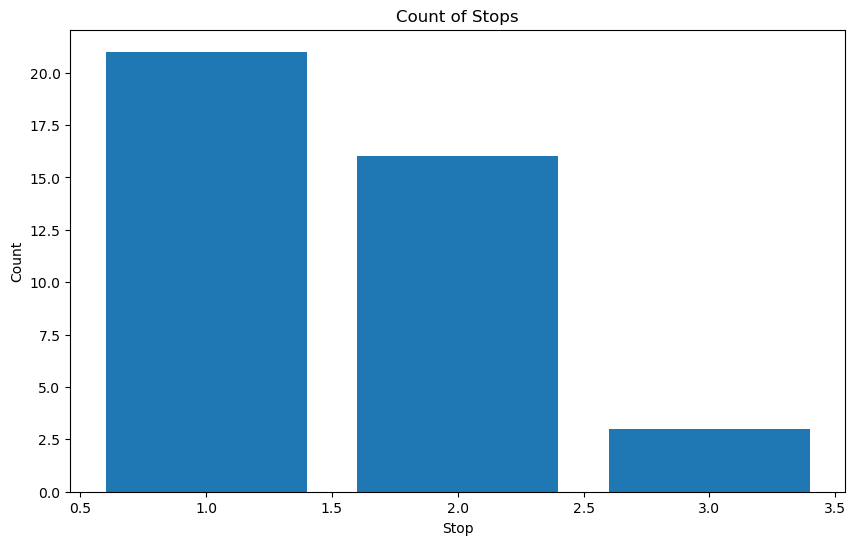

In [89]:
grouped_df = df4.groupBy('stop').count()


import matplotlib.pyplot as plt

 
pandas_df = grouped_df.toPandas()


# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pandas_df["stop"], pandas_df["count"])
plt.xlabel("Stop")
plt.ylabel("Count")
plt.title("Count of Stops")
plt.show()

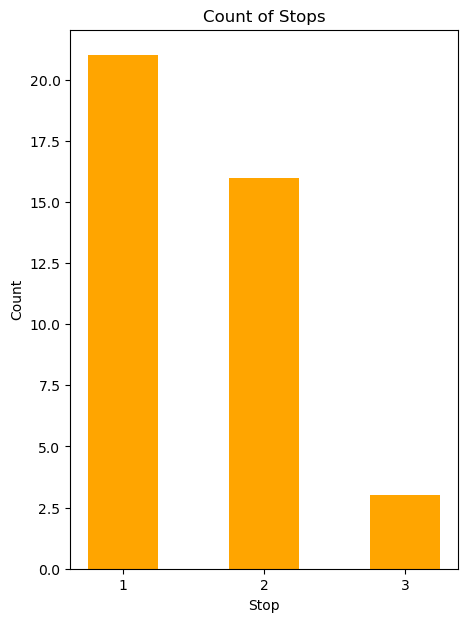

In [91]:
grouped_df = df4.groupBy('stop').count().orderBy('stop')

 

import matplotlib.pyplot as plt
pandas_df = grouped_df.toPandas()
plt.figure(figsize=(5,7))
plt.bar(pandas_df["stop"].astype(str), pandas_df["count"], color="Orange", width=0.5)
plt.xlabel("Stop")
plt.ylabel("Count")
plt.title("Count of Stops")
plt.show()

In [95]:
df4.sort("driverId").write.mode('overwrite').option("path",'/home/labuser/Desktop/Constructor_Parquet/Pit Stop.json').saveAsTable("pitlogs")

23/09/22 06:52:48 ERROR Executor: Exception in task 0.0 in stage 73.0 (TID 65)
org.apache.spark.SparkFileNotFoundException: /home/labuser/Desktop/Constructor_Parquet/Pit Stop.json (Is a directory)
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:794)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:234)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:293)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:125)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(

Py4JJavaError: An error occurred while calling o354.saveAsTable.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 73.0 failed 1 times, most recent failure: Lost task 0.0 in stage 73.0 (TID 65) (ip-172-31-0-163.ap-south-1.compute.internal executor driver): org.apache.spark.SparkFileNotFoundException: /home/labuser/Desktop/Constructor_Parquet/Pit Stop.json (Is a directory)
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:794)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:234)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:293)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:125)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.random.SamplingUtils$.reservoirSampleAndCount(SamplingUtils.scala:41)
	at org.apache.spark.RangePartitioner$.$anonfun$sketch$1(Partitioner.scala:322)
	at org.apache.spark.RangePartitioner$.$anonfun$sketch$1$adapted(Partitioner.scala:320)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndex$2(RDD.scala:905)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndex$2$adapted(RDD.scala:905)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2328)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1019)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1018)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:320)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:187)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:290)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:173)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:167)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture$lzycompute(ShuffleExchangeExec.scala:143)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture(ShuffleExchangeExec.scala:139)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.$anonfun$submitShuffleJob$1(ShuffleExchangeExec.scala:68)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob(ShuffleExchangeExec.scala:68)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob$(ShuffleExchangeExec.scala:67)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.submitShuffleJob(ShuffleExchangeExec.scala:115)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture$lzycompute(QueryStageExec.scala:181)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture(QueryStageExec.scala:181)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.doMaterialize(QueryStageExec.scala:183)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.materialize(QueryStageExec.scala:82)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5(AdaptiveSparkPlanExec.scala:266)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5$adapted(AdaptiveSparkPlanExec.scala:264)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:264)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:236)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:381)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:354)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.execution.datasources.DataSource.writeAndRead(DataSource.scala:511)
	at org.apache.spark.sql.execution.command.CreateDataSourceTableAsSelectCommand.saveDataIntoTable(createDataSourceTables.scala:228)
	at org.apache.spark.sql.execution.command.CreateDataSourceTableAsSelectCommand.run(createDataSourceTables.scala:183)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.createTable(DataFrameWriter.scala:697)
	at org.apache.spark.sql.DataFrameWriter.saveAsTable(DataFrameWriter.scala:675)
	at org.apache.spark.sql.DataFrameWriter.saveAsTable(DataFrameWriter.scala:570)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkFileNotFoundException: /home/labuser/Desktop/Constructor_Parquet/Pit Stop.json (Is a directory)
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:794)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:234)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:293)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:125)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.random.SamplingUtils$.reservoirSampleAndCount(SamplingUtils.scala:41)
	at org.apache.spark.RangePartitioner$.$anonfun$sketch$1(Partitioner.scala:322)
	at org.apache.spark.RangePartitioner$.$anonfun$sketch$1$adapted(Partitioner.scala:320)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndex$2(RDD.scala:905)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndex$2$adapted(RDD.scala:905)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [8]:
df_sales = spark.read.option("inferschema",True).option("header",True).csv("/home/labuser/Desktop/sales_data.csv")

In [9]:
df_product = spark.read.option("inferschema",True).option("header",True).csv("/home/labuser/Desktop/product_info.csv")

In [10]:
df_join = df_sales.join(df_product, df_sales.product_id==df_product.product_id, "inner")


In [11]:
df_join.show()

+--------------+----------+-----------+-------------+-------------------+----------+------------+-----------+-----+
|transaction_id|product_id|customer_id|quantity_sold|          timestamp|product_id|product_name|   category|price|
+--------------+----------+-----------+-------------+-------------------+----------+------------+-----------+-----+
|             1|       101|        201|            5|2023-09-22 10:15:00|       101|      Laptop|Electronics|  800|
|             2|       102|        202|            3|2023-09-22 11:30:00|       102|  Smartphone|Electronics|  600|
|             3|       101|        203|            2|2023-09-22 12:45:00|       101|      Laptop|Electronics|  800|
|             4|       103|        204|            1|2023-09-22 14:00:00|       103|        Desk|  Furniture|  250|
|             5|       102|        205|            4|2023-09-22 15:15:00|       102|  Smartphone|Electronics|  600|
+--------------+----------+-----------+-------------+-------------------

In [19]:
df_join = df_sales.join(df_product,on="product_id")

In [13]:
df_join.select(['transaction_id','customer_id','product_name','price'])

+--------------+-----------+------------+-----+
|transaction_id|customer_id|product_name|price|
+--------------+-----------+------------+-----+
|             1|        201|      Laptop|  800|
|             2|        202|  Smartphone|  600|
|             3|        203|      Laptop|  800|
|             4|        204|        Desk|  250|
|             5|        205|  Smartphone|  600|
+--------------+-----------+------------+-----+



In [28]:
df_join.filter("transaction_id=1").show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [29]:
df_join.where("transaction_id=1").show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [35]:
df_join.where(col("transaction_id")==1).show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [72]:
employees = [(1, "Scott", "Tiger", 1000.0, 
                      "united states", "+1 123 456 7890", "123 45 6789"
                     ),
                     (2, "Henry", "Ford", 1250.0, 
                      "India", "+91 234 567 8901", "456 78 9123"
                     ),
                     (3, "Nick", "Junior", 750.0, 
                      "united KINGDOM", "+44 111 111 1111", "222 33 4444"
                     ),
                     (4, "Bill", "Gomes", 1500.0, 
                      "AUSTRALIA", "+61 987 654 3210", "789 12 6118"
                     )
                ]

In [73]:
employeesDF = spark. \
    createDataFrame(employees,
                    schema="""employee_id INT, first_name STRING, 
                    last_name STRING, salary FLOAT, nationality STRING,
                    phone_number STRING, ssn STRING"""
                   )

In [75]:
employeesDF.withColumn("nationality", upper(col("nationality"))).\
    withColumn("ssn_last_4_digits", substring(col("ssn"), -4, 4).cast("int")).\
    withColumn("country_code", split(employeesDF["phone_number"], " ")[0].cast("int")).\
    withColumn("area_code", split(employeesDF["phone_number"], " ")[1].cast("int")).\
    show()

+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+------------+---------+
|employee_id|first_name|last_name|salary|   nationality|    phone_number|        ssn|ssn_last_4_digits|country_code|area_code|
+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+------------+---------+
|          1|     Scott|    Tiger|1000.0| UNITED STATES| +1 123 456 7890|123 45 6789|             6789|           1|      123|
|          2|     Henry|     Ford|1250.0|         INDIA|+91 234 567 8901|456 78 9123|             9123|          91|      234|
|          3|      Nick|   Junior| 750.0|UNITED KINGDOM|+44 111 111 1111|222 33 4444|             4444|          44|      111|
|          4|      Bill|    Gomes|1500.0|     AUSTRALIA|+61 987 654 3210|789 12 6118|             6118|          61|      987|
+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+--------

In [76]:
spark